In [ ]:
!pip install thop

In [3]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
import sys, os
project_root = '/content/drive/MyDrive/regularization-ml'

sys.path.append(project_root)
%cd {project_root}

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

from src.model import MiniCNN, ConvBlock, FCBlock
from src.train import trainModel
from src.data import CustomDataset, load_cifar_10_data, check_data_loading, Loader, class_to_idx
from src.visualizations import plotFmaps_and_activationHist, plotCurves
from src.utils import unpickle, loadWeights, readJson, genError, saveHistory, evalModel

In [ ]:
# Copy once from Drive
!cp /content/drive/MyDrive/regularization-ml/data/cifar-10-python.tar.gz /content/

# Extract locally
!mkdir /content/dataset/
!tar -xvzf /content/cifar-10-python.tar.gz -C /content/dataset/

In [ ]:
# Defining the layers for the baseline model
base_conv_layers = [
    ConvBlock(3, 64, pool=False),
    ConvBlock(64, 64),
    ConvBlock(64, 128, pool=False),
    ConvBlock(128, 128)
]

base_fc_layers = [
    FCBlock(128, 64),
    torch.nn.Linear(64, 10)
]

baseline_model = MiniCNN(base_conv_layers, base_fc_layers)

In [ ]:
%cd /content

In [ ]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = load_cifar_10_data()

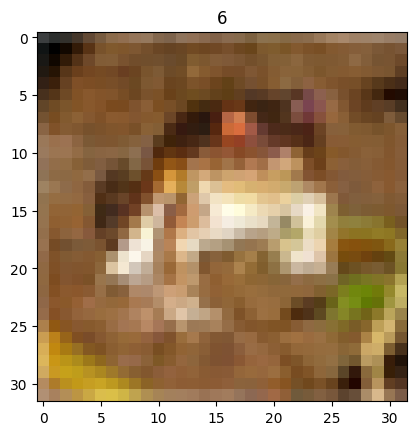

In [ ]:
# Just sanity testing
image_array = val_data[0]
image_label = val_labels[0]
image = image_array.reshape(3, 32, 32)
image = Image.fromarray(image.transpose(1, 2, 0)) #HWC
plt.imshow(image)
plt.title(image_label)
plt.show()

In [ ]:
train_loader, val_loader, test_loader = Loader(train_data, train_labels, val_data, val_labels, test_data, test_labels)

Starting Data Loading...
✅ CUDA available: Tesla T4
   Memory: 15095 MB
📁 Loading datasets...
✅ Datasets loaded successfully
Training samples: 40000
Validation samples: 10000
Batch size: 64
🔍 Testing data loading...
✅ Train batch shape: torch.Size([64, 3, 32, 32]), Labels: torch.Size([64])
   Input range: [-1.989, 2.126]
   Label range: [0, 9]
✅ Val batch shape: torch.Size([64, 3, 32, 32]), Labels: torch.Size([64])


In [ ]:
# Train the baseline model
history_base = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": [], "last_epoch": 0, "LR": []}
model_type = "baseline"
base_model = trainModel(baseline_model, history_base, train_loader, val_loader, model_type)
saveHistory(history_base, "baseline")

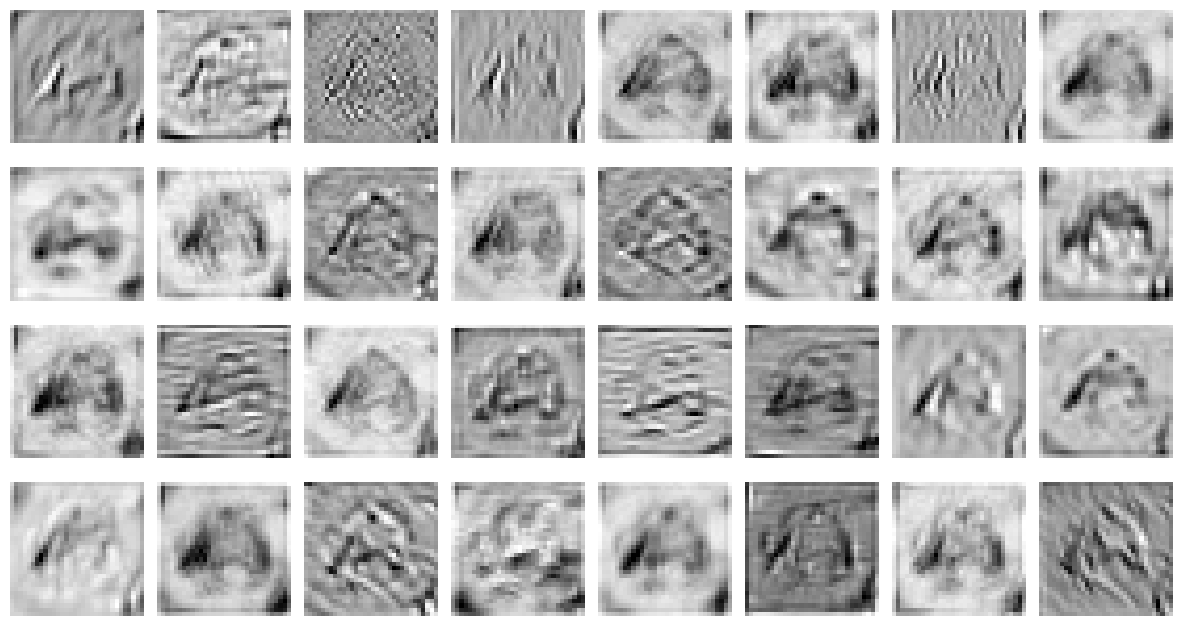

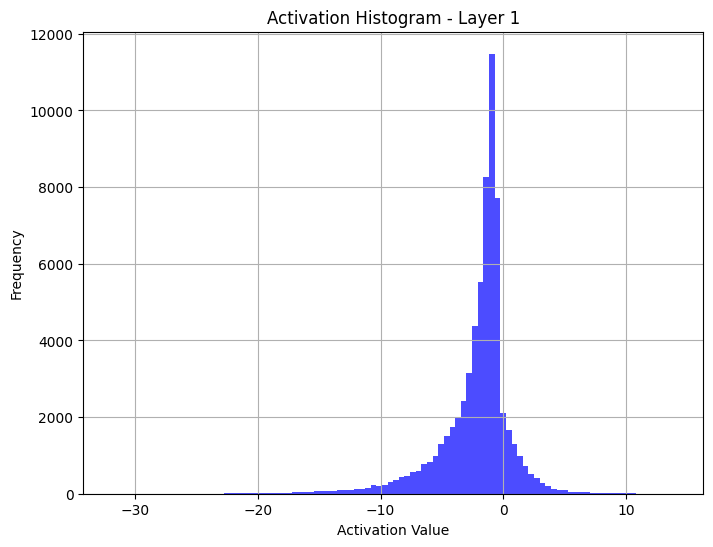

In [ ]:
plotFmaps_and_activationHist(baseline_model, "baseline", "model_best", val_loader, 1)

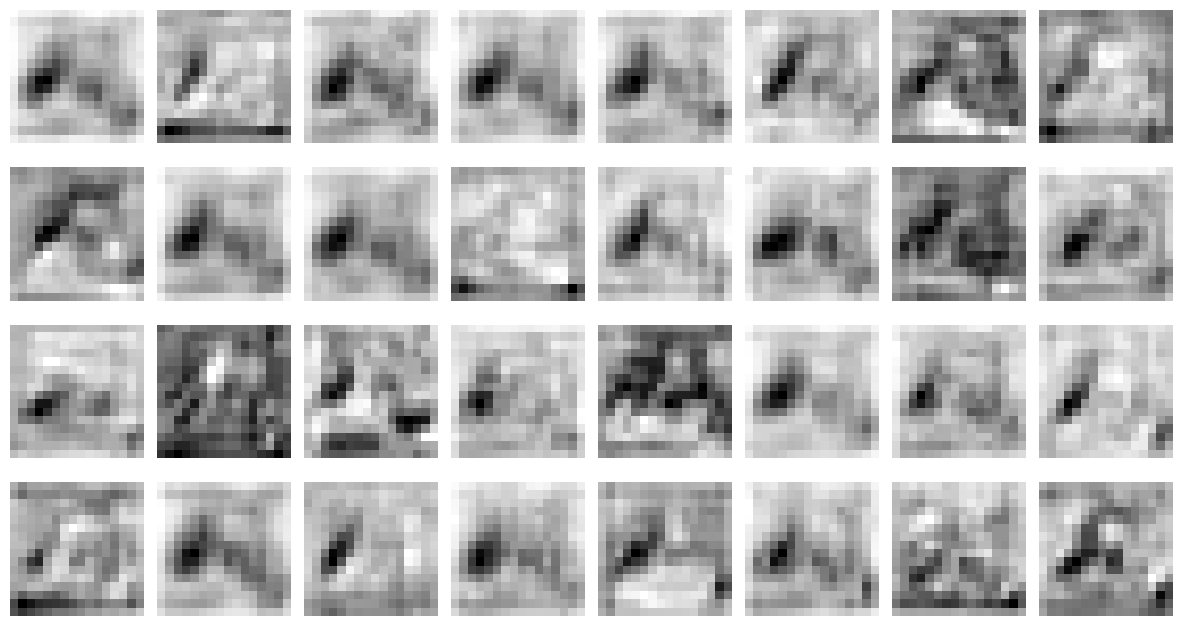

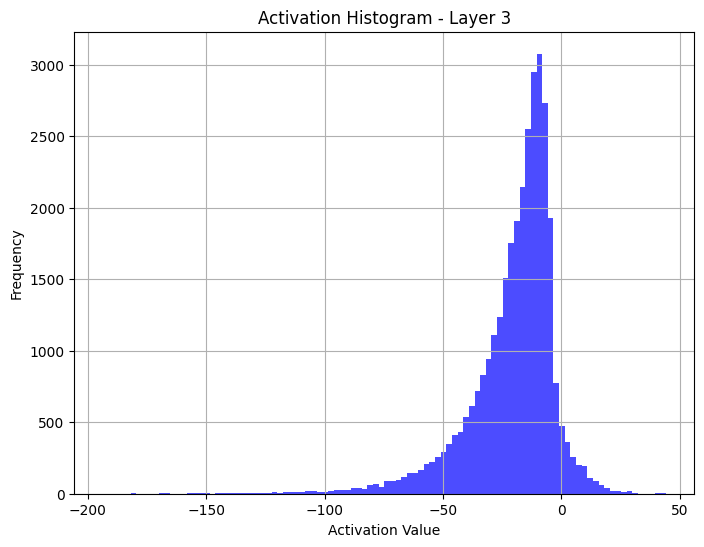

In [ ]:
plotFmaps_and_activationHist(baseline_model, "baseline", "model_best", val_loader, 3)

In [ ]:
baseline_data = readJson("baseline")
print(baseline_data.keys())

dict_keys(['train_loss', 'val_loss', 'train_acc', 'val_acc', 'last_epoch', 'LR'])


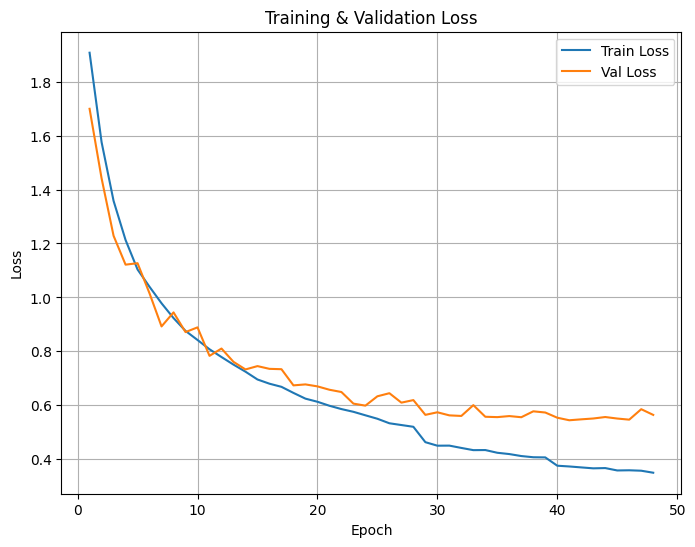

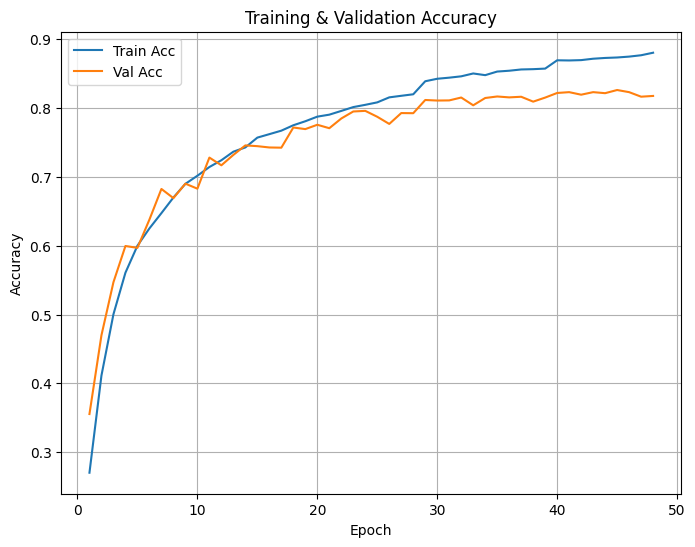

In [ ]:
train_losses = baseline_data["train_loss"]
val_losses = baseline_data["val_loss"]
train_accs = baseline_data["train_acc"]
val_accs = baseline_data["val_acc"]
plotCurves(train_losses, val_losses, train_accs, val_accs, "baseline")

Accuracy: 0.8242
              precision    recall  f1-score   support

           0     0.8404    0.8370    0.8387      1000
           1     0.8922    0.9350    0.9131      1000
           2     0.7426    0.7760    0.7589      1000
           3     0.6783    0.7000    0.6890      1000
           4     0.8570    0.7430    0.7959      1000
           5     0.7601    0.7510    0.7555      1000
           6     0.7989    0.8900    0.8420      1000
           7     0.8860    0.8160    0.8496      1000
           8     0.9046    0.9100    0.9073      1000
           9     0.8993    0.8840    0.8916      1000

    accuracy                         0.8242     10000
   macro avg     0.8259    0.8242    0.8242     10000
weighted avg     0.8259    0.8242    0.8242     10000

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequenti

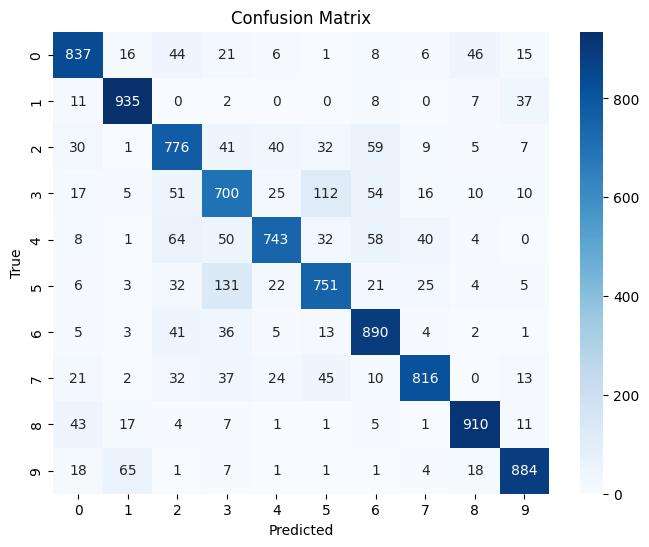

In [ ]:
evalModel(baseline_model, "baseline", "model_best", test_loader)

In [ ]:
%cd /content/drive/MyDrive/
!zip -r project_clean.zip project/ -x "*.ipynb_checkpoints*"
